Develop A Neural Network That Can Read Handwriting:

Begin your neural network machine learning project with the MNIST Handwritten Digit Classification Challenge and using Tensorflow and CNN. It has a very user-friendly interface that’s ideal for beginners. Dataset can be seen on MNIST or can find here.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from PIL import Image
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

%matplotlib inline

##Loading a dataset

In [ ]:
#Loading MNIST Data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
print('shape train_images:', train_images.shape)
print('shape train_labels:', train_labels.shape)
print('shape test_images:', test_images.shape)
print('shape test_labels:', test_labels.shape)

Размерность train_images: (60000, 28, 28)
Размерность train_labels: (60000,)
Размерность test_images: (10000, 28, 28)
Размерность test_labels: (10000,)


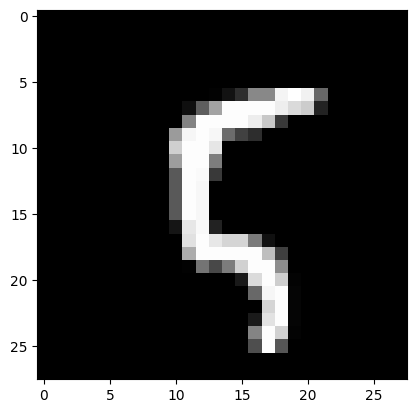

In [ ]:
#let's look at the 100th picture
n = 100
plt.imshow(Image.fromarray(train_images[n]).convert('RGBA'))
plt.show()

In [ ]:
train_images[100]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,  18,  46, 136, 136, 244, 255, 241, 103,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  94,
        163, 253, 253, 253, 253, 238, 218, 204,  35,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131, 253,
        253, 253, 253, 237, 200,  57,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 246, 253,
        247, 108,  65,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 207, 253, 253,
        230,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 157, 253, 253,
        125,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 250,
         57,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 247,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 247,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  89, 253, 247,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  21, 231, 249,
         34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 225, 253,
        231, 213, 213, 123,  16,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 172, 253,
        253, 253, 253, 253, 190,  63,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 116,
         72, 124, 209, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  25, 219, 253, 206,   3,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 104, 246, 253,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 213, 253,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  26, 226, 253,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
train_labels[100]

5

##EDA

In [ ]:
#Changing the data form
x_train = train_images.reshape((60000, 28, 28, 1))
x_test = test_images.reshape((10000, 28, 28, 1))

In [ ]:
#Data Normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
print('shape x_train:', x_train.shape)
print(x_train.shape[0], 'shape train')
print(x_test.shape[0], 'shape test')

Размерность x_train: (60000, 28, 28, 1)
60000 Размер train
10000 Размер test


In [ ]:
y_train = to_categorical(train_labels, num_classes=10)
y_test = to_categorical(test_labels, num_classes=10)

##Model1

In [ ]:
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
#Compilation of models
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Model training
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)

#Model evaluation
test_loss, test_acc = model.evaluate(x_train, y_train)
print(f"Test accuracy: {test_acc}")

Epoch 1/3
750/750 [==============================] - 4s 5ms/step - loss: 0.2919 - accuracy: 0.9167 - val_loss: 0.1447 - val_accuracy: 0.9569
Epoch 2/3
750/750 [==============================] - 3s 4ms/step - loss: 0.1200 - accuracy: 0.9638 - val_loss: 0.1081 - val_accuracy: 0.9676
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0636 - accuracy: 0.9809
Test accuracy: 0.98089998960495


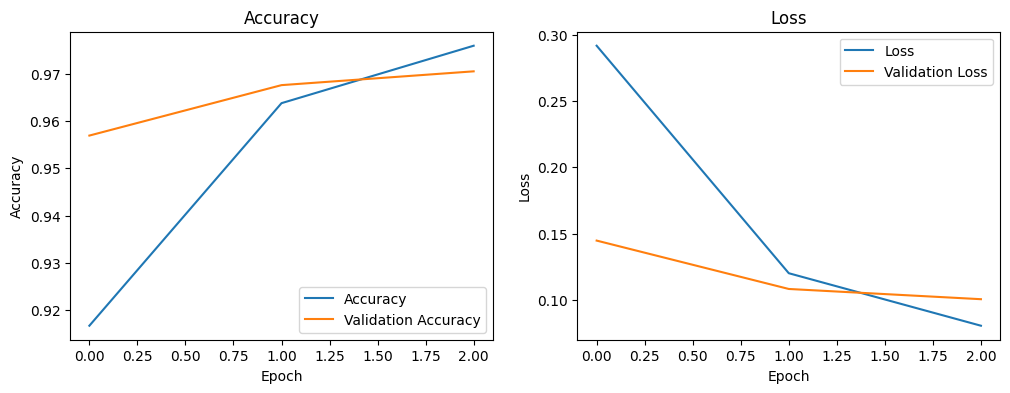

In [ ]:
#Visualization of results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

##Модель 2

In [ ]:
#Creating a CNN Model
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
#Compiling the model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Model training
history = model_2.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2)


Epoch 1/3
750/750 [==============================] - 41s 53ms/step - loss: 0.3647 - accuracy: 0.8877 - val_loss: 0.0736 - val_accuracy: 0.9771
Epoch 2/3
750/750 [==============================] - 40s 54ms/step - loss: 0.1143 - accuracy: 0.9666 - val_loss: 0.0508 - val_accuracy: 0.9852
Epoch 3/3
750/750 [==============================] - 39s 53ms/step - loss: 0.0830 - accuracy: 0.9769 - val_loss: 0.0485 - val_accuracy: 0.9861


In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [ ]:
#Model evaluation
test_loss, test_acc = model_2.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 3s 11ms/step - loss: 0.0400 - accuracy: 0.9866
Test accuracy: 0.9865999817848206


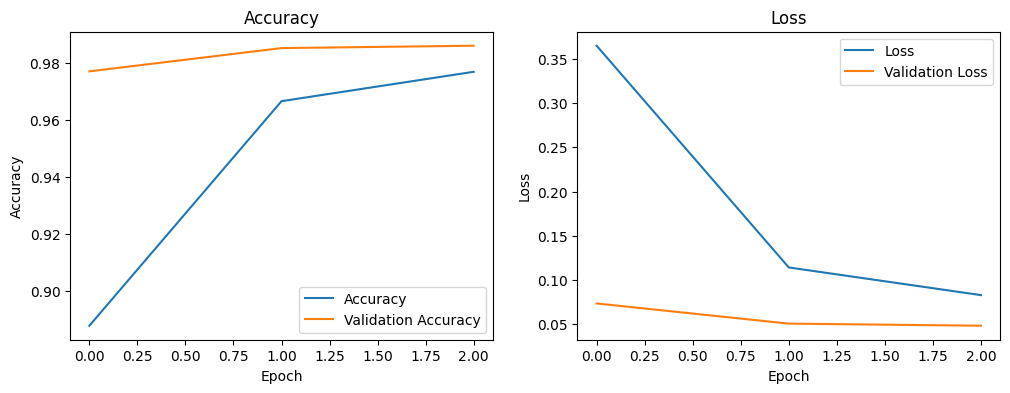

In [ ]:
#Visualization of results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()